In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/데이터/버스승하차/train.csv")
df

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,시내,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,415419,2019-09-30,32820000,시내,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,415420,2019-09-30,32820000,시내,2322,해병부대,33.23100,126.26273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415421,415421,2019-09-30,32820000,시내,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['id', 'date', 'bus_route_id', 'in_out', 'station_code', 'station_name',
       'latitude', 'longitude', '6~7_ride', '7~8_ride', '8~9_ride',
       '9~10_ride', '10~11_ride', '11~12_ride', '6~7_takeoff', '7~8_takeoff',
       '8~9_takeoff', '9~10_takeoff', '10~11_takeoff', '11~12_takeoff',
       '18~20_ride'],
      dtype='object')

#칼럼명
* id: 아이디
* date: 날짜
* bus_route_id: 버스 노선 ID
* in_out : 시내버스, 시외버스
* station_code : 정류소 ID
* station_name : 정류소의 이름
* latitude : 정류장의 위도
* longitude : 정류장의 경도
* _ ride : 시간 사이의 승차 인원
* _takeoff :  시간 사이의 하차 인원
* _ride : 18시에서 20시 사이의 승차 인원



# 결측치

In [ ]:
df.isna().sum()

id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
18~20_ride       0
dtype: int64

#시외 시내 버스의 수

([<matplotlib.patches.Wedge at 0x7f37511d5710>,
 [Text(-1.098492803711155, -0.05756353181317117, '시내'),
  Text(1.0984928070795825, 0.057563467532971584, '시외')],
 [Text(-0.5991778929333572, -0.031398290079911545, '98.3%'),
  Text(0.5991778947706813, 0.031398255017984496, '1.7%')])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45236 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text

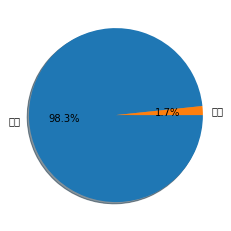

In [ ]:
import matplotlib.pyplot as plt
ratio= df["in_out"].value_counts()
label=ratio.index
explode = [1,2]
explode = explode
plt.pie(ratio, labels = label,
        autopct = '%1.1f%%', counterclock = False, shadow = True)

# 정류소 하차 인원 평균 수








In [ ]:
df1=df.groupby(df['station_code']).sum()
df1 # 0인 값이 매우 많음 

,id,bus_route_id,latitude,longitude,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
station_code,,,,,,,,,,,,,,,,,
1,27320993,3149270000,4425.21816,16703.85156,185.0,84.0,218.0,51.0,132.0,99.0,1.0,3.0,45.0,5.0,23.0,27.0,239.0
2,72158942,9666360000,11790.33504,44512.57536,44.0,179.0,196.0,170.0,179.0,181.0,43.0,29.0,41.0,72.0,51.0,40.0,589.0
3,30261202,3820830000,4823.34624,18209.69712,4.0,25.0,7.0,11.0,17.0,17.0,5.0,12.0,21.0,55.0,31.0,64.0,34.0
4,82787390,10899060000,13163.48784,49699.31841,141.0,487.0,439.0,407.0,249.0,154.0,12.0,15.0,18.0,37.0,29.0,43.0,296.0
5,51254861,6759650000,8239.78968,31109.46012,86.0,184.0,111.0,51.0,47.0,43.0,47.0,106.0,57.0,36.0,49.0,57.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115048,2008093,160400000,267.96464,1015.63288,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6115052,5521226,541350000,904.80321,3428.07309,1.0,43.0,51.0,45.0,73.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6115059,3994445,380760000,636.63889,2412.06767,0.0,2.0,21.0,23.0,27.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


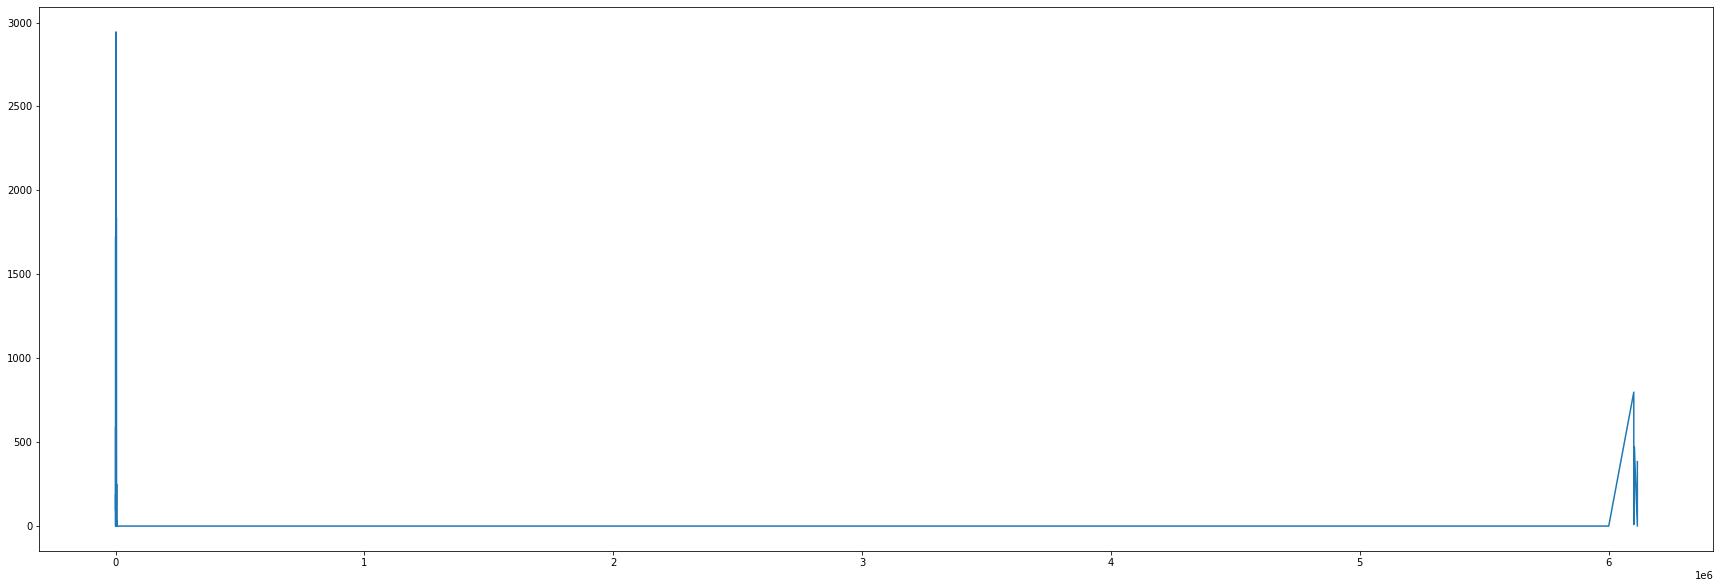

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(df1.index, df1['6~7_ride'])	
plt.show()

In [ ]:
# 6 ~ 12시까지 시간을 부여해서 시계열로 살펴보는게 좋을듯 

Int64Index([      1,       2,       3,       4,       5,       6,       7,
                  8,       9,      10,
            ...
            6115043, 6115044, 6115045, 6115046, 6115047, 6115048, 6115052,
            6115059, 6115100, 6115101],
           dtype='int64', name='station_code', length=3563)

In [ ]:
#전처리 1 date를 datetime으로 변환
import datetime
format = '%Y-%m-%d ' 
df['date']=pd.to_datetime(df['date'], format=format)

In [ ]:
# 전처리 2 시외, 시내 버스를 라벨인코딩 #시외=1 , 시내 =0 
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
encoder.fit(df['in_out'])
df['in_out'] = encoder.transform(df['in_out'])
df['in_out']

0         1
1         1
2         1
3         0
4         0
         ..
415418    0
415419    0
415420    0
415421    0
415422    0
Name: in_out, Length: 415423, dtype: int64

In [ ]:
# 시간대별 승하차와 date만 남기기 
df2=df.drop(columns=['id','bus_route_id','in_out','station_code','station_name','latitude','longitude'])
df2

,date,6~7_ride,7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,2019-09-01,0.0,1.0,2.0,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-09-01,1.0,4.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2019-09-01,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2019-09-01,0.0,17.0,6.0,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,2019-09-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,2019-09-30,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415419,2019-09-30,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415420,2019-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
415421,2019-09-30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


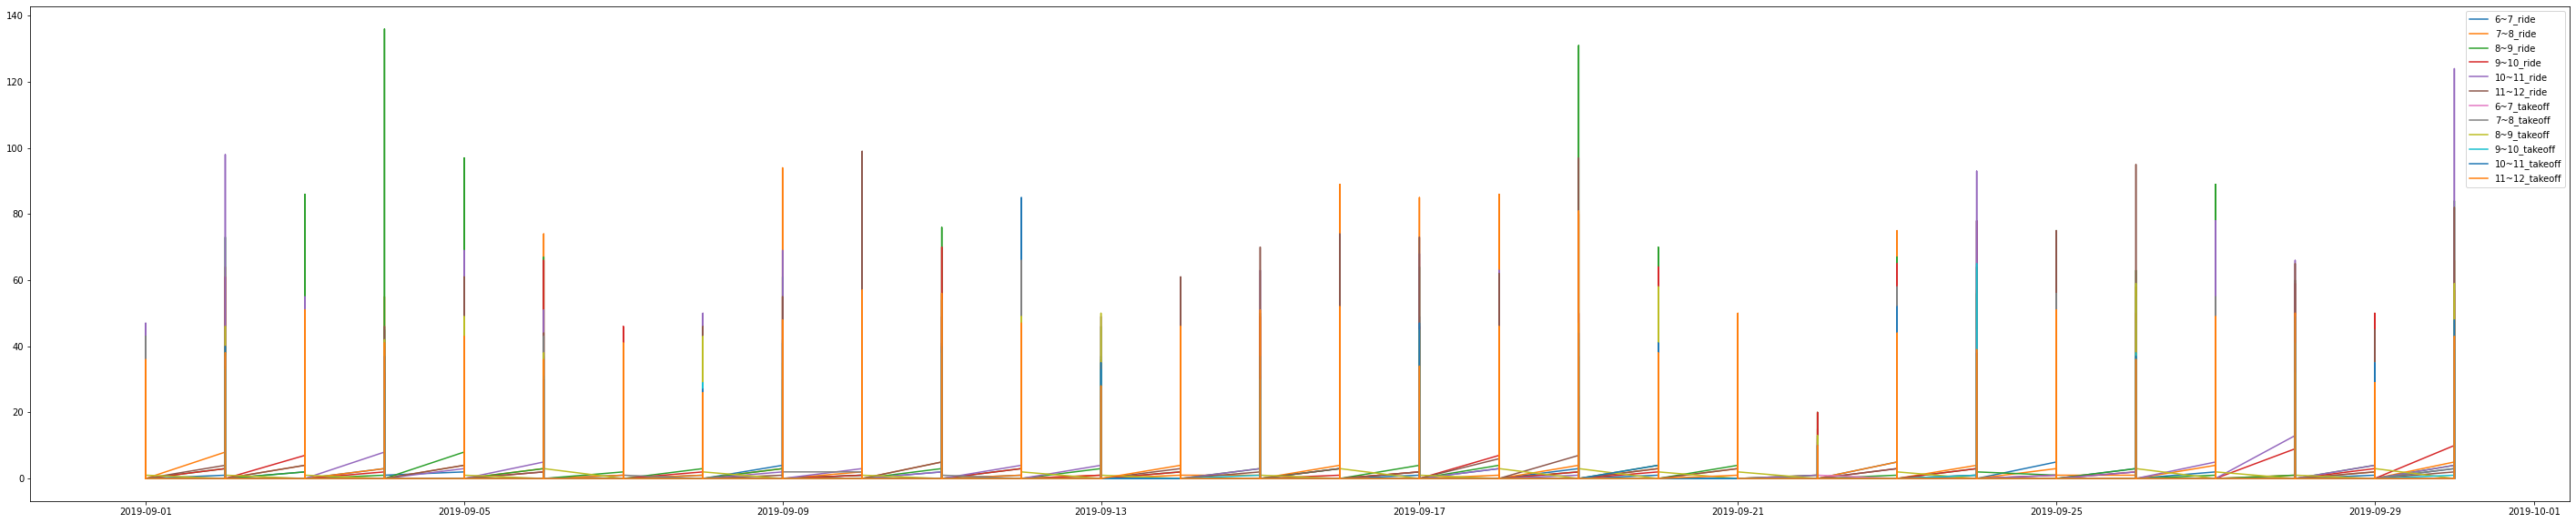

In [ ]:
plt.figure(figsize=(50,10))
plt.plot(df2['date'],df2['6~7_ride'],label='6~7_ride') 
plt.plot(df2['date'],df2['7~8_ride'],label='7~8_ride') 
plt.plot(df2['date'],df2['8~9_ride'],label='8~9_ride') 
plt.plot(df2['date'],df2['9~10_ride'],label='9~10_ride') 
plt.plot(df2['date'],df2['10~11_ride'],label='10~11_ride') 
plt.plot(df2['date'],df2['11~12_ride'],label='11~12_ride')
plt.plot(df2['date'],df2['6~7_takeoff'],label='6~7_takeoff') 
plt.plot(df2['date'],df2['7~8_takeoff'],label='7~8_takeoff') 
plt.plot(df2['date'],df2['8~9_takeoff'],label='8~9_takeoff') 
plt.plot(df2['date'],df2['9~10_takeoff'],label='9~10_takeoff') 
plt.plot(df2['date'],df2['10~11_takeoff'],label='10~11_takeoff') 
plt.plot(df2['date'],df2['11~12_takeoff'],label='11~12_takeoff') 
#plt.plot(df2['date'],df2['18~20_ride'],label='18~20_ride')
plt.legend() 
plt.show()



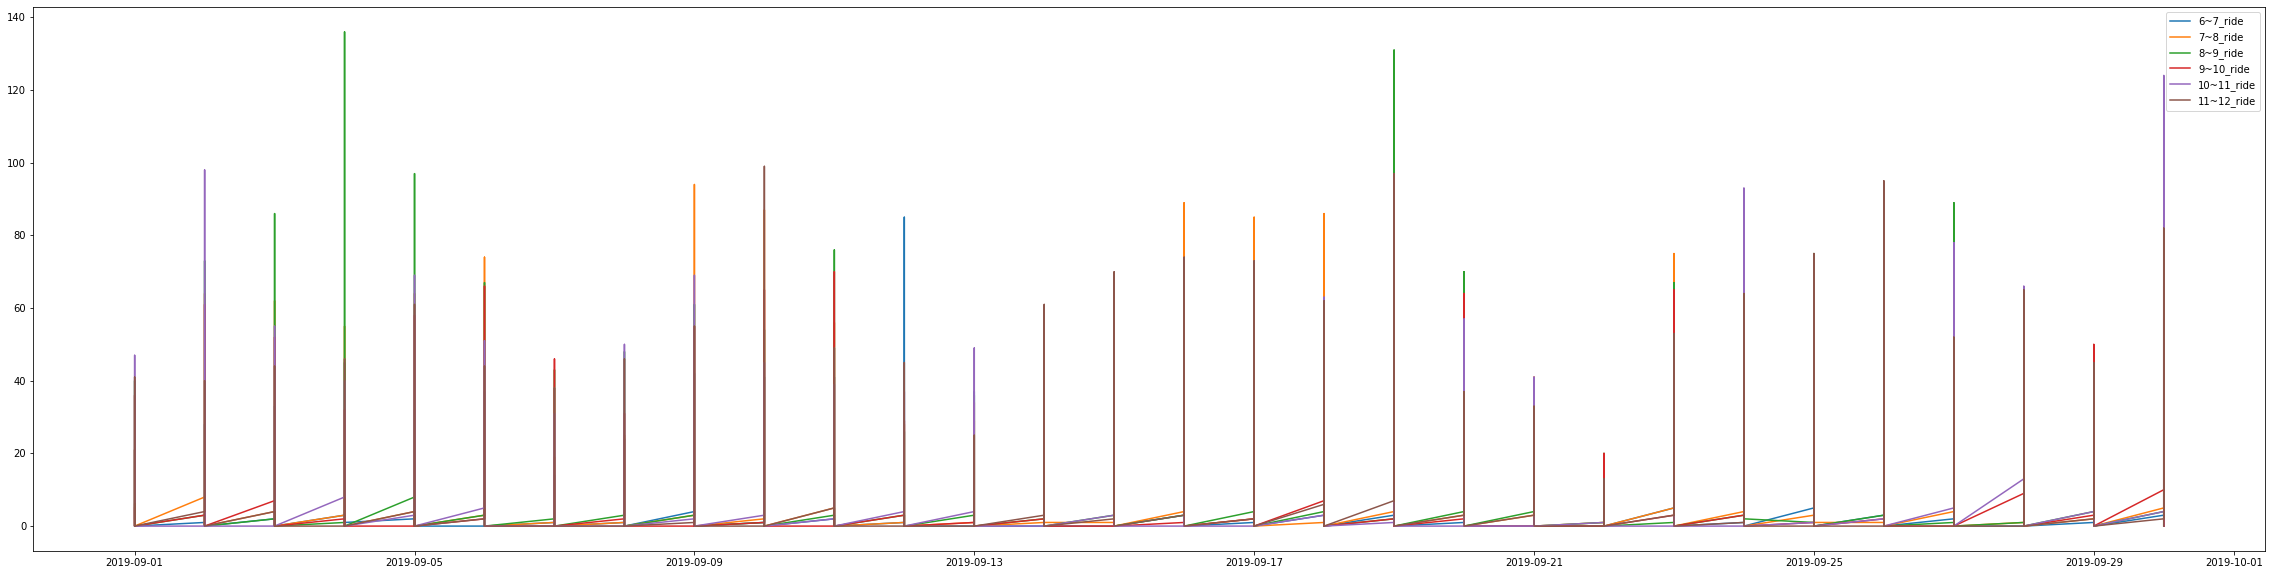

In [ ]:
#승차
plt.figure(figsize=(40,10))
plt.plot(df2['date'],df2['6~7_ride'],label='6~7_ride') 
plt.plot(df2['date'],df2['7~8_ride'],label='7~8_ride') 
plt.plot(df2['date'],df2['8~9_ride'],label='8~9_ride') 
plt.plot(df2['date'],df2['9~10_ride'],label='9~10_ride') 
plt.plot(df2['date'],df2['10~11_ride'],label='10~11_ride') 
plt.plot(df2['date'],df2['11~12_ride'],label='11~12_ride')
plt.legend() 
plt.show()


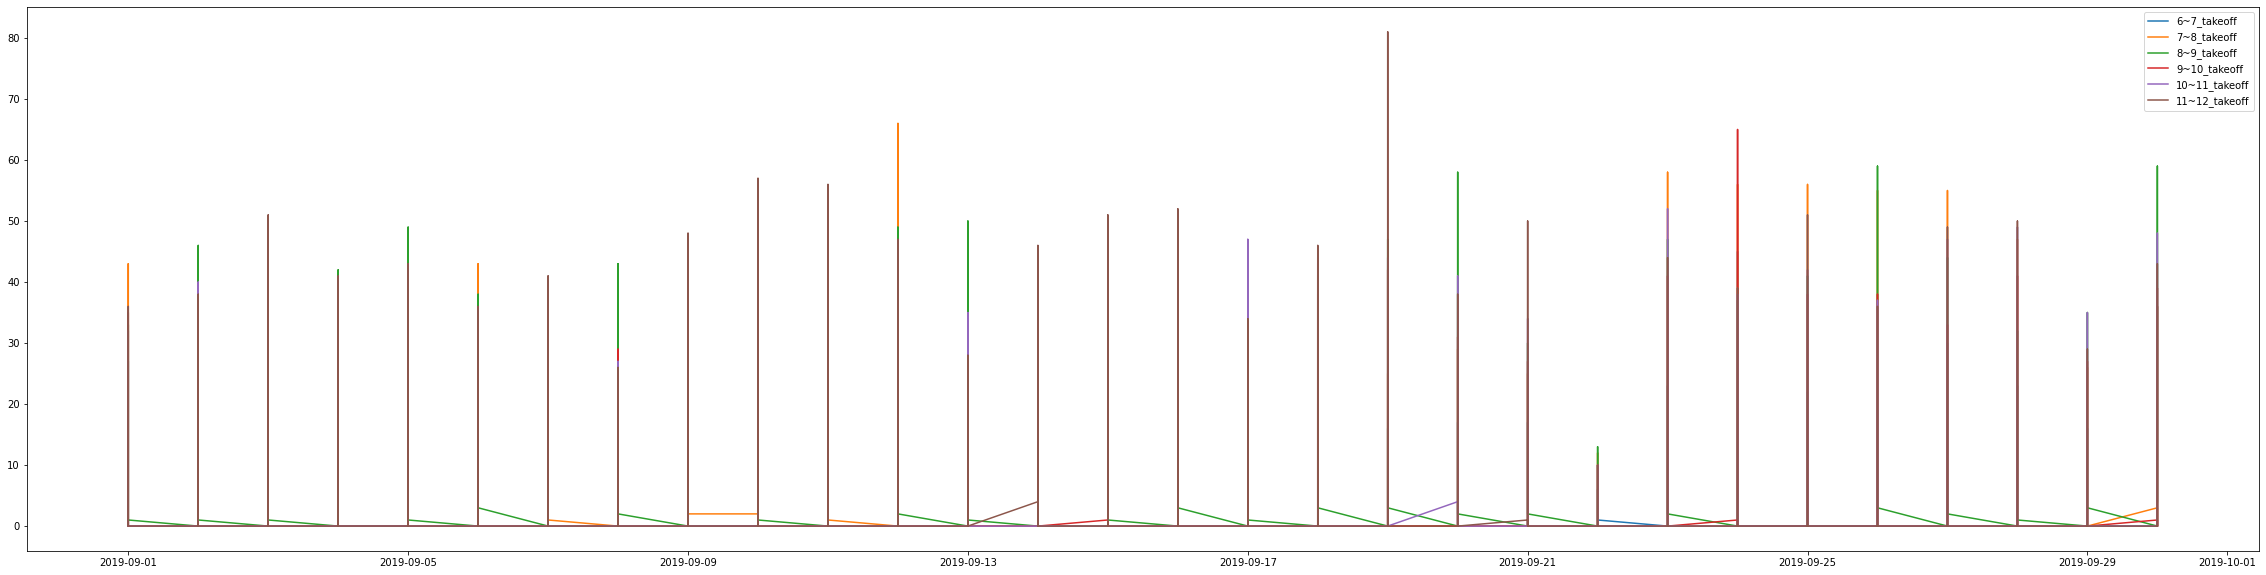

In [ ]:
plt.figure(figsize=(40,10))
plt.plot(df2['date'],df2['6~7_takeoff'],label='6~7_takeoff') 
plt.plot(df2['date'],df2['7~8_takeoff'],label='7~8_takeoff') 
plt.plot(df2['date'],df2['8~9_takeoff'],label='8~9_takeoff') 
plt.plot(df2['date'],df2['9~10_takeoff'],label='9~10_takeoff') 
plt.plot(df2['date'],df2['10~11_takeoff'],label='10~11_takeoff') 
plt.plot(df2['date'],df2['11~12_takeoff'],label='11~12_takeoff') 
#plt.plot(df2['date'],df2['18~20_ride'],label='18~20_ride')
plt.legend() 
plt.show()


In [ ]:
#전처리 3  요일 변수 추가 
df2['day']=df2['date'].dt.day_name()


In [ ]:
df2['day']

0         Sunday
1         Sunday
2         Sunday
3         Sunday
4         Sunday
           ...  
415418    Monday
415419    Monday
415420    Monday
415421    Monday
415422    Monday
Name: day, Length: 415423, dtype: object

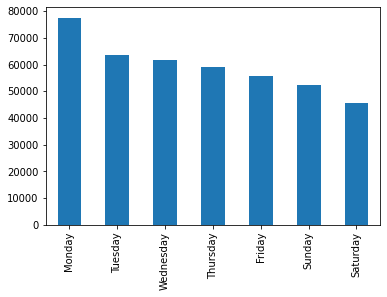

In [ ]:
df2['day'].value_counts().plot(kind='bar')

In [ ]:
df2['day'].value_counts()

Monday       77452
Tuesday      63418
Wednesday    61784
Thursday     58981
Friday       55695
Sunday       52506
Saturday     45587
Name: day, dtype: int64